## Введение

Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Посмотрим на датасет

In [ ]:
df.head()

Изучим датасет

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().mean()

In [ ]:
df.duplicated().sum()

In [ ]:
df['name'].value_counts()

### Вывод

В данном шаге подгрузили нужные библиотеки, изучили датасет разными методами. Дубликатов нет - это хорошо, а вот с пропусками дела обстоят намного хуже - в некоторых столбцах их очень много, в частности в "critic_score" их больше половины. Некоторые типы данных необходимо заменить. В названиях столбцов присутствуют заглавные буквы, они будут нам мешать - нужно их заменить строчными. Всего игр - 11559, значения их повторяются, значит одни и те же игры выходили для разных платформ.

## Предобработка данных

Приведем названия столбцов к нижнему регистру

In [ ]:
df.columns = df.columns.str.lower()

Заменим тип данных для столбцов. Для столбца "year_of_release" тип поменяем на int, чтобы не мешали нули после запятой (так как сейчас при попытке изменения типа выдается ошибка, тип заменим после предобработки). Столбцы "critic_score" и "user_score" переведем в числовой тип.

In [ ]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = df['year_of_release'].astype('int')
df["critic_score"] = pd.to_numeric(df["critic_score"], errors='coerce')
df["user_score"] = pd.to_numeric(df["user_score"], errors='coerce')

In [ ]:
df.info()

Проанализируем пропуски

In [ ]:
df[df['name'].isnull()]

In [ ]:
df[df['critic_score'].isnull()][50:100]

In [ ]:
df[(df['critic_score'].isnull()) & (df['year_of_release'] < '2010') & (df['na_sales'] > 1)]

In [ ]:
df[df['na_sales'] > 10].sort_values(by = 'name')

Пропуски удалять мы не станем, даже те, которые в столбцах "name" и "genre", так как это может серьезно исказить данные.

В столбце "year_of_release" пропуски заменим на годы выхода игры на других платформах.

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'))

В столбцах с оценками и рейтингом - на пустые значения, так как не получилось узнать по какой причине появились эти пропуски. Пропуски не зависят от ни от жанра, ни от года выхода, ни от количества продаж.

В столбце "user_score" значение "tbd" на NaN, так как аббревиатура to be determined означает, что игроки не определились какой рейтинг ставить.

In [ ]:
df["user_score"] = np.where(df["user_score"]=="tbd", np.nan, df["user_score"])

Добавим новый столбец с суммарными продажами по всем регионам

In [ ]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

Добавим переменную с уникальными названиями игр и годом их выпуска

In [ ]:
unique_names = df.groupby('name')['year_of_release'].max()
unique_names = unique_names.reset_index()
unique_names

Теперь заменим тип в столбце года выхода, пропущенные значения удалим

In [ ]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
df.info()

### Вывод

В данном шаге предобработали данные: привели названия столбцов к нижнему регистру, заменили типы некоторых данных, проанализировали пропуски, некоторые заполнили, также добавили столбец с суммарными продажами по всем регионам

## Анализ данных

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посмотрим сколько игр выпускалось в разные годы

In [ ]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [ ]:
len(df['name'].unique())

11427

Видно, что до 1994 года игры выпускалось менее 100, а значит данные по этим годам не так важны. Также после 2011 года выпуск новых игр начал уменьшаться. Однако, нужно помнить, что в сгруппированном виде присутствует 16446 названий игр, однако уникальных в них всего - 11560, значит разница между этими цифрами - это повторяющиеся игры для разных платформ. Теперь сгруппируем по годам уникальные названия игр

In [ ]:
unique_names.groupby('year_of_release')['name'].count()

В целом ничего не изменилось - данные по годам меньше 1994 не так важны

Посмотрим платформы с наибольшими суммарными продажами

In [ ]:
top_5_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head()
top_5_total_sales

Выделим из общей таблицы платформы с топ-5 по продажам и создадим переменную из них

In [ ]:
only_top_5 = df.query('platform in @top_5_total_sales.index')
only_top_5

Создадим сводную таблицу, показывающую распределние суммарных продаж по годам для топ-5 платформ, и посмотрим на основании ее график.

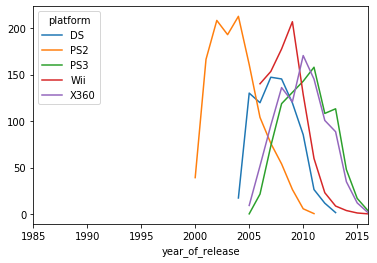

In [ ]:
pd.pivot_table(data=only_top_5, values="total_sales",columns="platform",index="year_of_release", aggfunc = 'sum').plot()

На графике видно, что средняя продолжительность жизни платфрмы - 10 лет, с пиком продаж на середине жизненного цикла.

Выберем потенциально прибыльные платформы. Критерием отбора будет год выпуска игр - больше 2013 года, так как те игры, которые выпускались раньше - выпускались на старые платформы, пик популярности которых уже прошел

In [ ]:
df_potential_over = df[(df['year_of_release'] > 2013)]
df_potential_over['platform'].unique()
df_potential_over
df_potential_over.groupby('platform').count()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
3DS,212,212,212,212,212,212,212,51,55,74,212
PC,151,151,151,151,151,151,151,116,122,110,151
PS3,219,219,219,219,219,219,219,36,98,113,219
PS4,376,376,376,376,376,376,376,237,242,240,376
PSP,13,13,13,13,13,13,13,0,0,0,13
PSV,295,295,295,295,295,295,295,54,73,81,295
Wii,11,11,11,11,11,11,11,0,2,9,11
WiiU,73,73,73,73,73,73,73,43,48,53,73
X360,111,111,111,111,111,111,111,26,83,91,111


Под данные критерии попадают 10 платформ, но если посмотреть количество выпускаемых для них игр и учесть, что скоро жизненный цикл некоторых платформ закончится, то можно выделить всего 3 - PS4, 3DS, XOne

Объединим данные по потенциальным платформам в новой переменной и построим ящики с усами

In [ ]:
df_potential = df_potential_over[df_potential_over['platform'].isin(['PS4','3DS','XOne'])]
df_potential = df_potential.reset_index()

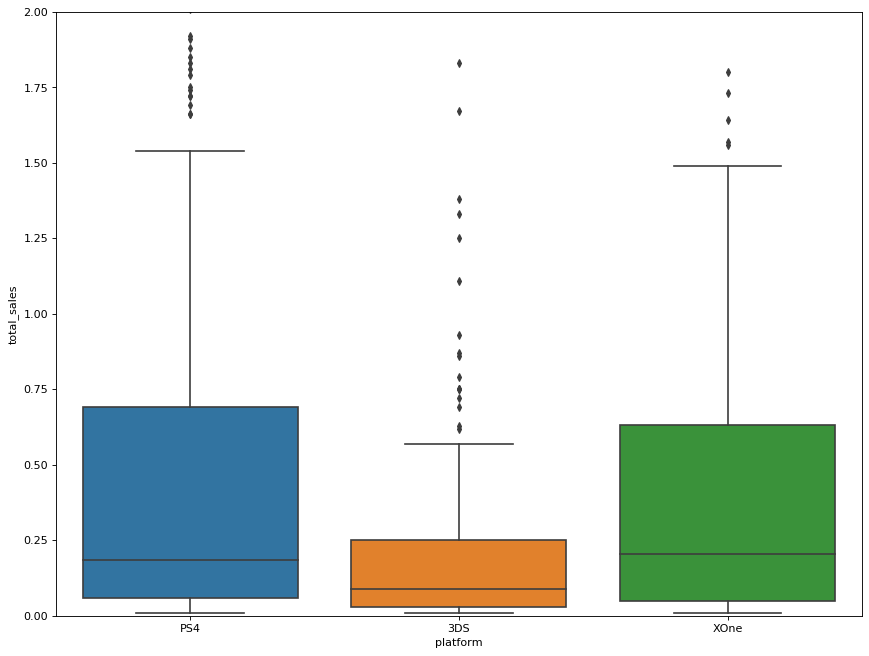

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
plt.ylim(0, 2)
sns.boxplot(x='platform', y='total_sales', data=df_potential)

Исходя из построенных боксплотов можно утверждать, что в среднем игры продаются практически одинаковыми тиражами для PS4 и XOne. А игры для 3DS продаются значительно меньшим числом.

Построим диаграммы рессеяния и посчитаем корреляцию между продажами и отзывами пользоватлей и критиков для XOne

In [ ]:
df_xone = df_potential[df_potential['platform'] == 'XOne']
df_xone

Text(0.5, 1.0, 'Зависимость оценок критиков и продаж игр для XOne')

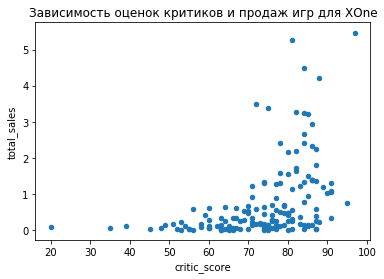

In [ ]:
df_xone.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж игр для XOne')

In [ ]:
df_xone['total_sales'].corr(df_xone['critic_score'])

0.42867694370333226

Text(0.5, 1.0, 'Зависимость оценок игроков и продаж игр для XOne')

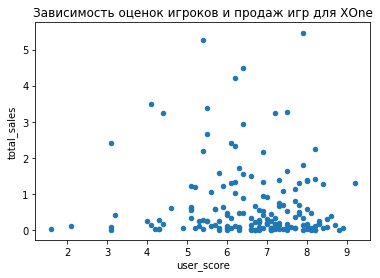

In [ ]:
df_xone.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок игроков и продаж игр для XOne')

In [ ]:
df_xone['total_sales'].corr(df_xone['user_score'])

-0.0703839280647581

Можно утверждать, что оценки критиков влияют на продажи игр, но не сильно. А вот оценки игроков практически не влияют на продажи

Соотнесем выводы с продажами игр на других платформах

PS4:

In [ ]:
df_ps4 = df_potential[df_potential['platform'] == 'PS4']
df_ps4

Text(0.5, 1.0, 'Зависимость оценок критиков и продаж игр для PS4')

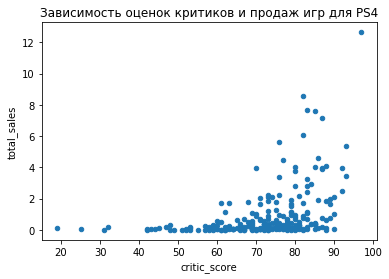

In [ ]:
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж игр для PS4')

In [ ]:
df_ps4['total_sales'].corr(df_ps4['critic_score'])

0.40266141068104083

Text(0.5, 1.0, 'Зависимость оценок игроков и продаж игр для PS4')

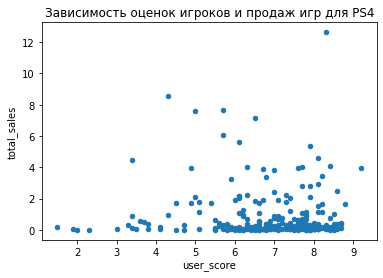

In [ ]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок игроков и продаж игр для PS4')

In [ ]:
df_ps4['total_sales'].corr(df_ps4['user_score'])

-0.040131589472697356

3DS:

In [ ]:
df_3ds = df_potential[df_potential['platform'] == '3DS']
df_3ds

Text(0.5, 1.0, 'Зависимость оценок критиков и продаж игр для 3DS')

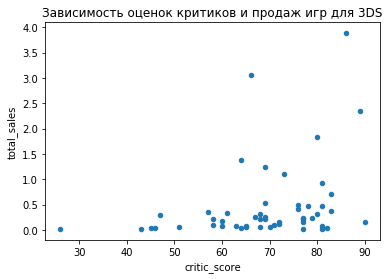

In [ ]:
df_3ds.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж игр для 3DS')

In [ ]:
df_3ds['total_sales'].corr(df_3ds['critic_score'])

0.31411749286905105

Text(0.5, 1.0, 'Зависимость оценок игроков и продаж игр для 3DS')

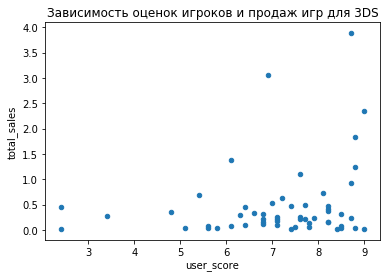

In [ ]:
df_3ds.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок игроков и продаж игр для 3DS')

In [ ]:
df_3ds['total_sales'].corr(df_3ds['user_score'])

0.2151932718527028

Корреляция между продажами игр и отзывами критиков сохраняется для всех потенциально прибыльных платформ. Корреляция между продажами игр и отзывами пользователей для PS4 и XOne практически одинаковы, а вот для 3DS отличается от них.

Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами

In [ ]:
top_genres = df_potential.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

In [ ]:
top_genres

genre
Action          144.74
Shooter         133.85
Role-Playing     79.56
Sports           75.01
Misc             18.36
Fighting         18.00
Racing           17.05
Adventure        10.59
Platform         10.02
Simulation        5.69
Strategy          1.43
Puzzle            0.89
Name: total_sales, dtype: float64

Посмотрим боксплот прожаж по жанрам, количество проланных игр в каждом жанре и медианные продажи в жанре

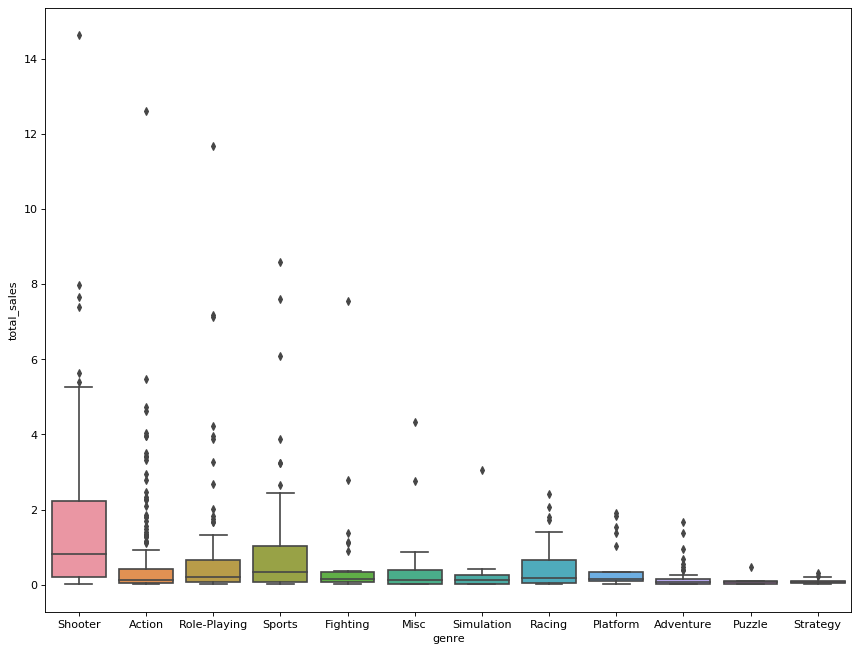

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='genre', y='total_sales', data=df_potential)

In [ ]:
df_potential.groupby('genre').count()

,index,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
genre,,,,,,,,,,,,
Action,310,310,310,310,310,310,310,310,150,164,172,310
Adventure,63,63,63,63,63,63,63,63,22,25,27,63
Fighting,27,27,27,27,27,27,27,27,16,16,16,27
Misc,56,56,56,56,56,56,56,56,22,22,28,56
Platform,21,21,21,21,21,21,21,21,17,17,18,21
Puzzle,8,8,8,8,8,8,8,8,2,2,4,8
Racing,36,36,36,36,36,36,36,36,28,28,28,36
Role-Playing,106,106,106,106,106,106,106,106,45,45,46,106
Shooter,74,74,74,74,74,74,74,74,62,61,62,74


In [ ]:
top_genres = df_potential.groupby('genre')['total_sales'].mean().sort_values(ascending = False)
top_genres

genre
Shooter         1.808784
Sports          0.926049
Role-Playing    0.750566
Fighting        0.666667
Platform        0.477143
Racing          0.473611
Action          0.466903
Misc            0.327857
Simulation      0.299474
Adventure       0.168095
Puzzle          0.111250
Strategy        0.095333
Name: total_sales, dtype: float64

### Вывод

В данном шаге рассмотрели сколько игр выпускалось в разные годы, выбрали платформы с наибольшим суммарными продажами и посмотрели рапределения по годам, посмотрели средний цикл жизни платформы. Выбрали несколько потенциально прибыльных платформ. Посмотрели как влияют отзывы критиков и пользователей на продажи для этих платформ. Выделили наиболее востребованные и менее востребованные жанры игр.

## Анализ пользователей разных регионов

Определим для пользователей каждого региона топ-5 популярных платформ

Топ-5 для региона NA:

In [ ]:
df_potential_over.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Топ-5 для региона EU:

In [ ]:
df_potential_over.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Топ-5 для региона JP:

In [ ]:
df_potential_over.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Видно, что для Японского региона популярны приставки японского происхождения, в то время как приставки американского происхождения не входят даже в том-5. В Американском регионе лидер приставка американского производства, хотя остальные практически не отстают. В Европе японская приставка - в лидерах, американская - немного отстает.

Определим для пользователей каждого региона топ-5 популярных жанров

Топ-5 для региона NA:

In [ ]:
df_potential_over.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [ ]:
df_potential_over.groupby('genre')['na_sales'].mean().sort_values(ascending = False).head()

genre
Shooter         0.617344
Sports          0.286522
Fighting        0.207167
Platform        0.178684
Role-Playing    0.151448
Name: na_sales, dtype: float64

Топ-5 для региона EU:

In [ ]:
df_potential_over.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [ ]:
df_potential_over.groupby('genre')['eu_sales'].mean().sort_values(ascending = False).head()

genre
Shooter       0.511875
Sports        0.284037
Racing        0.204783
Platform      0.178947
Simulation    0.165909
Name: eu_sales, dtype: float64

Топ-5 для региона JP:

In [ ]:
df_potential_over.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [ ]:
df_potential_over.groupby('genre')['jp_sales'].mean().sort_values(ascending = False).head()

genre
Role-Playing    0.140995
Fighting        0.106167
Platform        0.070789
Puzzle          0.066429
Simulation      0.052500
Name: jp_sales, dtype: float64

Топ-5 игр для всех регионов выглядят похоже, но в Японском регионе, в отличие от других, пользователи особенно любят ролевые игры

Определим влияет ли ESRB рейтинг на продажи для пользовотелей каждого региона

Заменим пропущенные значения в ESRB рейтинге значением unknown

In [ ]:
df_potential_over['rating'] .fillna('unknown', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Для региона NA:

In [ ]:
df_potential_over.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

Для региона EU:

In [ ]:
df_potential_over.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

Для региона JP:

In [ ]:
df_potential_over.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

Как мы видим самый популярный рейтинг игр - Е во всех регионах. В топ-3 во всех регионах также входят рейтинги М и Т.

### Вывод

В данном шаге проанализировали самые популярные платформы, жанры и рейтинги для разных регионов

## Проверим гипотезы

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За нулевую теорию примем то что они одинаковые, за альтернативную - то что они отличаются. Критерием оценки примем оценку пользователей

In [ ]:
xone_test = df_potential_over[df_potential_over['platform'] == 'XOne']['user_score']
#xone_test

In [ ]:
pc_test = df_potential_over[df_potential_over['platform'] == 'PC']['user_score']
#pc_test

In [ ]:
alpha = 0.05

results = st.ttest_ind(xone_test.dropna(), pc_test.dropna(), equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


По результатам теста видно, что средние пользовательские рейтинги платформ одинаковые

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. За нулевую теорию примем то что они одинаковые, за альтернативную - то что они отличаются. Критерием оценки примем оценку пользователей

In [ ]:
action_test = df_potential_over[df_potential_over['genre'] == 'Action']['user_score']

In [ ]:
sports_test = df_potential_over[df_potential_over['genre'] == 'Sports']['user_score']

In [ ]:
alpha = 0.05

results = st.ttest_ind(action_test.dropna(), sports_test.dropna(), equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


По результатам теста видно, что средние пользовательские рейтинги жанров разные

### Вывод

Проведены тесты, результаты которых подтвердили первую теорию и отвергли вторую

## Общий вывод

Исходя из проведенного исследования целесообразно будет сделать ставку на следующие продукты:

- для региона NA: платформы - Xone, PS4. Жанры - Shooter, Action, Sports, Role-Playing, Fighting. Рейтинг игр - М, Е и Т;
- для региона EU: платформы - Xone, PS4, PC. Жанры - Shooter, Action, Sports, Racing. Рейтинг игр - М, Е и Т;
- для региона JP: платформы - PS4, 3DS, PSV. Жанры - Action, Role-Playing, Fighting. Возрастной рейтинг определить не удалось.